In [ ]:
!pip install dataprofiler

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns



import json

from dataprofiler import Data, Profiler

In [ ]:
df = pd.read_csv("Students_Performance_mv.csv")

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##**Phase0**

In [ ]:
df.isna().sum()

gender                          0
race/ethnicity                 11
parental level of education    21
lunch                          12
test preparation course         4
math score                      0
reading score                   0
writing score                   0
dtype: int64

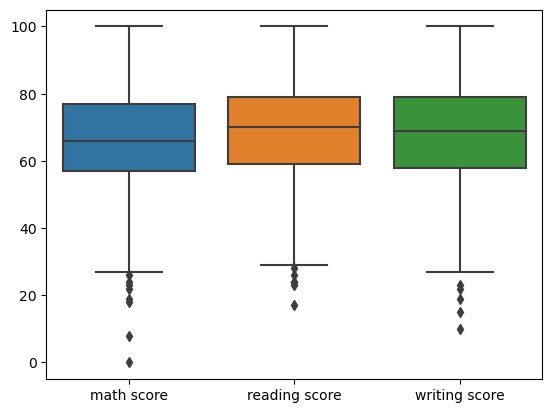

In [ ]:
sns.boxplot(data=df)

plt.show()

In [ ]:
len(df)

1000

In [ ]:
df.iloc[101,:] = df.iloc[205,:]

df.iloc[190,:] = df.iloc[1,:]

df.iloc[138,:] = df.iloc[145,:]


In [ ]:
df.duplicated().sum()

3

#Profiling column Gender


In [ ]:
df['gender'].isna().sum()

0

In [ ]:
type(df['gender'])

pandas.core.series.Series

In [ ]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [ ]:
df['gender'].describe()

count       1000
unique         2
top       female
freq         518
Name: gender, dtype: object

#Profiling column race/ethnicity


In [ ]:
df['race/ethnicity'].isna().sum()

11

In [ ]:
df["race/ethnicity"].value_counts()

race/ethnicity
group C    316
group D    261
group B    187
group E    137
group A     88
Name: count, dtype: int64

In [ ]:
df["race/ethnicity"].describe()

count         989
unique          5
top       group C
freq          316
Name: race/ethnicity, dtype: object

#Profiling column lunch


In [ ]:
df['lunch'].isna().sum()

12

In [ ]:
df['lunch'].value_counts()

lunch
standard        636
free/reduced    352
Name: count, dtype: int64

In [ ]:
df['lunch'].describe()

count          988
unique           2
top       standard
freq           636
Name: lunch, dtype: object

#Profiling column test preparation course


In [ ]:
df['test preparation course'].isna().sum()

4

In [ ]:
df['test preparation course'].describe()

count      996
unique       2
top       none
freq       638
Name: test preparation course, dtype: object

In [ ]:
df['test preparation course'].value_counts()

test preparation course
none         638
completed    358
Name: count, dtype: int64

#Profiling column math score


In [ ]:
df['math score'].isna().sum()

0

In [ ]:
df['math score'].describe()

count    1000.000000
mean       66.061000
std        15.227645
min         0.000000
25%        57.000000
50%        66.000000
75%        77.000000
max       100.000000
Name: math score, dtype: float64

#Profiling column reading score

In [ ]:
df['reading score'].isna().sum()

0

In [ ]:
df['reading score'].describe()

count    1000.000000
mean       69.164000
std        14.644575
min        17.000000
25%        59.000000
50%        70.000000
75%        79.250000
max       100.000000
Name: reading score, dtype: float64

#Profiling column writing score

In [ ]:
df['writing score'].isna().sum()

0

In [ ]:
df['writing score'].describe()

count    1000.000000
mean       68.043000
std        15.251156
min        10.000000
25%        57.000000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing score, dtype: float64

In [ ]:
# @title #Profiler

profile = Profiler(df)

report  = profile.report(report_options={"output_format":"pretty"})

print(json.dumps(report, indent=4))

INFO:DataProfiler.profilers.profile_builder: Finding the Null values in the columns... 


F:\Anaconda\Lib\site-packages\dataprofiler\profilers\profile_builder.py:757: RuntimeWarning: 

!!! WARNING Partial Profiler Failure !!!

Profiling Type: data_labeler
Exception: ModuleNotFoundError
Message: No module named 'tensorflow'

For labeler errors, try installing the extra ml requirements via:

$ pip install dataprofiler[ml] --user


  profiler_utils.warn_on_profile("data_labeler", e)
100%|██████████| 8/8 [00:00<00:00, 512.09it/s]

INFO:DataProfiler.profilers.profile_builder: Calculating the statistics... 



100%|██████████| 8/8 [00:00<00:00, 26.82it/s]

{
    "global_stats": {
        "samples_used": 1000,
        "column_count": 8,
        "row_count": 1000,
        "row_has_null_ratio": 0.658,
        "row_is_null_ratio": 0.0,
        "unique_row_ratio": 0.997,
        "duplicate_row_count": 3,
        "file_type": "<class 'pandas.core.frame.DataFrame'>",
        "encoding": null,
        "correlation_matrix": null,
        "chi2_matrix": "[[1., 0., 0., 0., 0., 0., 0., 0.], ... , [0.       , 0.       , 0.       , 0.       , 0.       , 0.3636629,\n  0.7693701, 1.       ]]",
        "profile_schema": {
            "gender": [
                0
            ],
            "race/ethnicity": [
                1
            ],
            "parental level of education": [
                2
            ],
            "lunch": [
                3
            ],
            "test preparation course": [
                4
            ],
            "math score": [
                5
            ],
            "reading score": [
                6


##**Phase 1&2**

In [ ]:
df.isna().sum()

gender                          0
race/ethnicity                 11
parental level of education    21
lunch                          12
test preparation course         4
math score                      0
reading score                   0
writing score                   0
dtype: int64

##**Handling Missing Values**

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [ ]:
for i in range(len(df)):

    if pd.isna(df["race/ethnicity"][i]):

        if df["parental level of education"][i] in ["bachelor's degree", "master's degree"]:

            df.at[i, 'race/ethnicity'] = "group B"

        elif df["parental level of education"][i] == "associate's degree":

            df.at[i, 'race/ethnicity'] = "group A"

        else:

            df.at[i, 'race/ethnicity'] = "group C"





    if pd.isna(df["parental level of education"][i]):

        if df['race/ethnicity'][i] == "group B":

            df.at[i, 'parental level of education'] = "bachelor's degree"

        elif df['race/ethnicity'][i] == "group C":

            df.at[i, 'parental level of education'] = "some college"

        elif df['race/ethnicity'][i] == "group A":

            df.at[i, 'parental level of education'] = "associate's degree"

        elif df['race/ethnicity'][i] == "group D":

            df.at[i, 'parental level of education'] = "high school"

        elif df['race/ethnicity'][i] == "group E":

            df.at[i, 'parental level of education'] = "some high school"



    if pd.isna(df["lunch"][i]):

         if df["parental level of education"][i] in ["bachelor's degree", "master's degree","associate's degree"]:

                df.at[i,"lunch"] = 'standard'

         else:

            df.at[i,"lunch"] = 'free/reduced'



    if pd.isna(df["test preparation course"][i]):

        if df["parental level of education"][i] in ["bachelor's degree", "master's degree","associate's degree"]:

            df.at[i,"test preparation course"] = "completed"




In [ ]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        3
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

##**Validation Schema**

In [ ]:
!pip install pandera[io]

  Obtaining dependency information for pandera[io] from https://files.pythonhosted.org/packages/b2/69/35e315fd583f02a911858a5e3af1950fc1bb5f50a90f300fe2ba308c7c58/pandera-0.19.2-py3-none-any.whl.metadata
  Obtaining dependency information for multimethod<=1.10.0 from https://files.pythonhosted.org/packages/7f/bd/750245e47e7f307d9f94d4fa84727f4ed9956005dfa671d58be1d531a0f6/multimethod-1.10-py3-none-any.whl.metadata
  Obtaining dependency information for typeguard from https://files.pythonhosted.org/packages/d9/59/e02336eb478ccdfc9bb0d4c27ce04a4260cd8b45aa04f6b00bcfdbb66a2a/typeguard-4.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for typing-inspect>=0.6.0 from https://files.pythonhosted.org/packages/65/f3/107a22063bf27bdccf2024833d3445f4eea42b2e598abfbd46f6a63b6cb0/typing_inspect-0.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for frictionless<=4.40.8 from https://files.pythonhosted.org/packages/9b/9f/e0665962954bd22b1c3648fcba81547f6408914bfd580d86

In [ ]:
import pandera as pa

from pandera import Column, DataFrameSchema, Check, Index





schema = pa.DataFrameSchema(

    {

        "gender": Column(str,Check.isin(["male", "female"])),

        "race/ethnicity": Column(str, Check.isin(["group A", "group B", "group C", "group D","group E"])),



        'parental level of education': Column(str,Check.isin(["bachelor's degree", 'some college', "master's degree",

       "associate's degree", 'high school', 'some high school'])),



        'lunch': Column(str,Check.isin(['standard', 'free/reduced'])),

        "test preparation course": Column(str,Check.isin(['none', 'completed'])),

        "math score": Column(int, Check.in_range(0, 100)),

        "reading score": Column(int, Check.in_range(0, 100)),

        "writing score": Column(int, Check.in_range(0, 100))

    },



)



validated_df = schema(df)

print(validated_df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

#**Data Randomization**

In [ ]:
import string



import random

def randomize_values(df):

    for column in df.columns:

        if df[column].dtype == 'O': #datatype is object

            df[column] = [''.join(random.choices(string.ascii_letters + string.digits, k=10))

            for _ in range(len(df))] #generate a list of random strings for this cell

    return df

In [ ]:
df_randimoized = randomize_values(df)



df_randimoized

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0hNfsD4EsR,hvbXe3WJ27,Xbq5GK1M8r,hjEP1UGZxD,qbsMzLCXXF,72,72,74
1,AKXIBakA5L,FGv6mnOkHX,Y8JLR6YDCZ,f0oWQEdqZ8,utgGryEyPB,69,90,88
2,foU8iJ7Gec,znN3bVFbnm,Ic2yfaEnDv,GX9Fy6EaYI,dome80jtki,90,95,93
3,utkbebEZ05,OQAyqjkkNk,eU69wivD9P,2YdgWJYpCr,lfCrGaYrrQ,47,57,44
4,o0fTZmehC0,d7rdn7PRm0,3VYoWIR6tO,8GRcl4Lnv8,S2COWYkwrN,76,78,75
...,...,...,...,...,...,...,...,...
995,JbQ913mWAg,RtOTema0AC,UFLrTnh9Mr,npkt34wEBp,qLrGeyNpb0,88,99,95
996,x2dtQXL0Ca,SkSVV3njLv,FJDu2etBCA,YFtXa0m1tC,SyD3UvAqWR,62,55,55
997,cB671FZlzJ,6jLCWF6qJ5,ZKFO2CMB3u,2rygaPCkLJ,sRcrk0GGPi,59,71,65
998,Zb9viiTclf,2qmjAegsAq,M6W6Ykcscj,tqj8Yrtswf,olMRSBRHqB,68,78,77


##**Masking**

In [ ]:
!pip install anonymizedf

  Obtaining dependency information for anonymizedf from https://files.pythonhosted.org/packages/d1/1f/54b8001c141b23e4fdb28769c9bf131ad7e94a2455e178bcc99a68ec695e/anonymizedf-1.0.1-py3-none-any.whl.metadata


In [ ]:
from anonymizedf.anonymizedf import anonymize



faked_df = df





an = anonymize(faked_df)







column_list = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',

       'test preparation course', 'math score', 'reading score',  'writing score']





for column in column_list:

    if df[column].dtype == 'O':

        an.fake_categories(column)

    else:

        an.fake_whole_numbers(column)







faked_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Fake_gender,Fake_race/ethnicity,Fake_parental level of education,Fake_lunch,Fake_test preparation course,Fake_math score,Fake_reading score,Fake_writing score
0,0hNfsD4EsR,hvbXe3WJ27,Xbq5GK1M8r,hjEP1UGZxD,qbsMzLCXXF,72,72,74,gender 1,race/ethnicity 1,parental level of education 1,lunch 1,test preparation course 1,74,30,12
1,AKXIBakA5L,FGv6mnOkHX,Y8JLR6YDCZ,f0oWQEdqZ8,utgGryEyPB,69,90,88,gender 2,race/ethnicity 2,parental level of education 2,lunch 2,test preparation course 2,21,89,55
2,foU8iJ7Gec,znN3bVFbnm,Ic2yfaEnDv,GX9Fy6EaYI,dome80jtki,90,95,93,gender 3,race/ethnicity 3,parental level of education 3,lunch 3,test preparation course 3,71,97,31
3,utkbebEZ05,OQAyqjkkNk,eU69wivD9P,2YdgWJYpCr,lfCrGaYrrQ,47,57,44,gender 4,race/ethnicity 4,parental level of education 4,lunch 4,test preparation course 4,16,59,52
4,o0fTZmehC0,d7rdn7PRm0,3VYoWIR6tO,8GRcl4Lnv8,S2COWYkwrN,76,78,75,gender 5,race/ethnicity 5,parental level of education 5,lunch 5,test preparation course 5,37,47,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,JbQ913mWAg,RtOTema0AC,UFLrTnh9Mr,npkt34wEBp,qLrGeyNpb0,88,99,95,gender 993,race/ethnicity 993,parental level of education 993,lunch 993,test preparation course 993,13,70,20
996,x2dtQXL0Ca,SkSVV3njLv,FJDu2etBCA,YFtXa0m1tC,SyD3UvAqWR,62,55,55,gender 994,race/ethnicity 994,parental level of education 994,lunch 994,test preparation course 994,99,52,73
997,cB671FZlzJ,6jLCWF6qJ5,ZKFO2CMB3u,2rygaPCkLJ,sRcrk0GGPi,59,71,65,gender 995,race/ethnicity 995,parental level of education 995,lunch 995,test preparation course 995,35,39,91
998,Zb9viiTclf,2qmjAegsAq,M6W6Ykcscj,tqj8Yrtswf,olMRSBRHqB,68,78,77,gender 996,race/ethnicity 996,parental level of education 996,lunch 996,test preparation course 996,64,47,13


In [ ]:
df.to_csv('DSAI_202_Final_Project_data.csv', index=False)